Датасет "рейтинг фільмів"


Ссилка на датасет : https://query.data.world/s/pzgan56f6mhndk2duo5fiaxdh7eh2a

# Підготовка датасету

In [1]:
# підключимо бібліотеку pandas для обробки даних (вона вже встановлена в Colab)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import datasets, linear_model

# зазначимо url звідки ми візьмемо дані
url = "https://query.data.world/s/pzgan56f6mhndk2duo5fiaxdh7eh2a.csv"
#https://data.world/data-society/imdb-5000-movie-dataset

# створимо pandas Dataframe з csv-файлу, який ми отримаємо по вищезазначеному url
# Dataframe надасть нам необхідні можливості для обробки даних
df = pd.read_csv(url)
df.drop(["color", "num_critic_for_reviews" ,"gross","plot_keywords","language",
         "director_facebook_likes", "actor_3_facebook_likes", "content_rating", 
         "movie_imdb_link", "facenumber_in_poster", "actor_3_name", "actor_2_name",
         "actor_1_facebook_likes", "actor_1_name", "actor_2_facebook_likes", 
         "aspect_ratio"], axis=1, inplace=True)
df.tail()


,director_name,duration,genres,movie_title,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,budget,title_year,imdb_score,movie_facebook_likes
5038,Scott Smith,87.0,Comedy|Drama,Signed Sealed Delivered,629,2283,6.0,Canada,NaN,2013.0,7.7,84
5039,NaN,43.0,Crime|Drama|Mystery|Thriller,The Following,73839,1753,359.0,USA,NaN,NaN,7.5,32000
5040,Benjamin Roberds,76.0,Drama|Horror|Thriller,A Plague So Pleasant,38,0,3.0,USA,1400.0,2013.0,6.3,16
5041,Daniel Hsia,100.0,Comedy|Drama|Romance,Shanghai Calling,1255,2386,9.0,USA,NaN,2012.0,6.3,660
5042,Jon Gunn,90.0,Documentary,My Date with Drew,4285,163,84.0,USA,1100.0,2004.0,6.6,456


#Лабораторна робота №1

## Перша частина

In [0]:
#резюме колонки з бюджетом
df["budget"].describe()

count    4.551000e+03
mean     3.975262e+07
std      2.061149e+08
min      2.180000e+02
25%      6.000000e+06
50%      2.000000e+07
75%      4.500000e+07
max      1.221550e+10
Name: budget, dtype: float64

In [0]:
# мода - значення режисера, яке зустрічається максимально часто.
df["director_name"].mode()

0    Steven Spielberg
dtype: object

In [0]:
#середне арифметичне
df["imdb_score"].mean()

6.442137616498116

In [0]:
# медіана - значення рейтингу, яке ділить впорядковану множину даних навпіл.
df["imdb_score"].median()

6.6

In [0]:
# середнє геометричне (середнє пропорційне)
from scipy.stats.mstats import gmean

gmean(df.iloc[:,11:12], axis=0)

array([], dtype=float64)

In [0]:
# середнє гармонічне
from scipy.stats.mstats import hmean

hmean(df.iloc[:,11:12], axis=0)

array([], dtype=float64)

In [0]:
# варіаціний ряд
import numpy as np
df.quantile(np.linspace(.1, 1, 9, 0))
#df.dropna().quantile([0.0, .3, .7, .9, .99])

,duration,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes
0.1,86.0,21.1,1400000.0,1988.0,5.0,0.0
0.2,91.0,48.0,4000000.0,1997.0,5.6,0.0
0.3,95.0,81.3,8000000.0,2000.0,6.0,0.0
0.4,99.0,116.0,13000000.0,2003.0,6.3,0.0
0.5,103.0,156.0,20000000.0,2005.0,6.6,166.0
0.6,108.0,209.0,26000000.0,2008.0,6.8,489.0
0.7,114.0,279.0,36000000.0,2010.0,7.1,934.0
0.8,122.0,391.0,55000000.0,2012.0,7.4,11000.0
0.9,134.0,630.0,85000000.0,2014.0,7.8,24000.0


## Контрольні питанння
 1.  Які основні емпіричні методи ви знаєте? Коротко опишіть їх суть.
    1) Спостереження — цілеспрямоване сприйняття явищ.
        Дає можливість зібрати інформацію та створити емпіричні факти та гіпотези.
    2) Опис — Фіксація засобами мови відомостей про об'єкти , конспектування висновків після спостереження.
    3) Вимірювання — порівняння об'єктів по яких-небудь загальних властивостях.
    4) Експеримент — спостереження в спеціально створених контрольованих умовах.
    5) Порівняння — одночасне співвідносне дослідження і оцінка загальних для двох та більше об'єктів властивостей та ознак.

2. Яка основна задача застосування емпіричних методів?
    Підтвердити або спростувати гіпотези на основі аналізу статистичних показників.


3. Що таке статистичний показник? Яка його суть?
    Це одна з основний категорій статистики, яка характеризує суспільні явища та процеси у поєднанні кількісної та якісної визначеності.
Будь-який статистичний показник є поєднанням якісної та кількісної складових. Якісна складова показника обумовлюється сутністю та змістом явища і знаходить відображення у назві показника, наприклад, чисельність постійного населення, прибуток від операційної діяльності, ціна тощо. Крім цього, до якісної складової належить одиниця виміру, територія та час, до яких відноситься показник.

4. Опишіть суть закону великих чисел.
    Завжди знайдеться така кількість випробувань, при якій з будь-якою заданою наперед імовірністю частота появи деякої події буде як завгодно мало відрізнятися від її імовірності.


5. В чому полягає ключова небезпека при нерозумінні до якої області відноситься величина: "Крайнестану" чи "Среднестану"?
    Величина "Крайнестану" може суттєво змінити вихідні дані, в той час як величана "Среднестану" майже їх не змінює.


6. Опишіть процес первинної обробки даних. 
Первинна обробка даних включає в себе:

-табуляцію

-впорядкування у варіаційні послідовності (або ряди)

-групування (при побудові інтервального варіаційного ряду)

-побудову статистичного розподілу

-обчислення окремих статистичних параметрів


7. Що таке табуляція? Які види табуляції ви знаєте? За яких умов варто застосовувати кожен з них?
табуляція це коли користувач здатний структурувати свій документ, щоб він не тільки виглядав помітно, але і правильно форматувався під вимоги оформлення. Крім того, завдяки табуляції можна без особливих проблем створювати спеціальні колонки і призначати поділ тексту, яка в подальшому дає максимальний ефект в плані візуального розуміння і пошуку необхідної інформації (у разі, якщо документ великий). Даний елемент з'явився відразу після створення редакторів тексту і був звичайним плагіном для оформлення тексту.
    1) Табулювання — підготовка даних, підрахунок кількості подій, які попадають в різні категорії.
    2) Проста табуляція — підрахунок кількості подій, які попадають в кожну категорію, коли категорії базуються на одній змінній.
    3) Перехресна табуляція — підрахунок кількості подій, які попадають в кожну з декількох категорій, коли категорії базуються на двох і більш змінних, що розглядаються одночасно.


8. Що таке експеримент?
    Проведення у визначених умовах серії дослідів для спостереження за станом об'єкта дослідження, які дозволяють стежити за його змінами і відтворювати їх кожний раз під час повторення дослідів.



## Друга частина

## Контрольні запитання

1. Що таке вибірка? Яку вибірку можна назвати репрезентативною ?
    Вибірка - це множина об'єктів, подій, зразків або сукупність вимірів, за допомогою визначеної процедури вибраних з генеральної сукупності(ГС) для участі в дослідженні.
    Репрезентативна вибірка - вибірка, що відображає властивості ГС.

2. В чому ключова відмінність між стратифікованою та груповою виборками?
    Ідея стратифікованої вибірки в розбитті ГС на декілька відмінних груп і застосування методу простої випадкової вибірки(ППВ), тобто взяти представників ГС абсолютно випадковим чином. Групова вибірка це та ж сама стратифікована вибірка, але представники ГС повинні бути схожими між собою.


3. В чому полягає критичний недолік розмаху? І чому на вашу думку це є саме критичним недоліком?
    Основна проблему в тому , що він використовує лише 2 крайніх значення, що можуть сильно відрізнятися він більшості значень. І будь-які зміни цих значень будуть вкрай відчутно відображатись на результаті.


4. В чому полягає різниця між дисперсією та середнім квадратичним відхиленням?
    Дисперсія - це середній квадрат відхилень індивідуальних значень показника від його середнього значення. А середнє квадратичне відхилення  відображає наскільки в середньому кожен елемент нашої вибірки відхиляється від середнього значення по даній вибірці.


5. За що відповідають квантилі розподілу? Яким чином їх можна найкраще представити?
    Квартилі розподілу - це 3 точки, які ділять впорядковану множину даних на чотири рівних частини. В діаграмі найнижча тока- найменше число , найвища точка - найбільше.


6. Що таке міжквартильний розмах ?
     Різниця між верхньою і нижньою межею. Чим більше значення має цей розмах - тим більша варіативність показника.


7. Коли дедлайн здачі лаб №1 і що в неї входить? 😅
    10.10.2018 в 24:00

## Проста випадкова вибірка

In [0]:
df.sample(11)

,director_name,duration,genres,movie_title,num_user_for_reviews,country,budget,title_year,imdb_score,movie_facebook_likes
2280,David Koepp,102.0,Comedy|Drama|Fantasy|Romance,Ghost Town,147.0,USA,20000000.0,2008.0,6.7,0
3659,Prachya Pinkaew,111.0,Action|Crime|Drama|Thriller,The Protector,214.0,Thailand,200000000.0,2005.0,7.1,0
2752,Daniele Luchetti,98.0,Biography,Chiamatemi Francesco - Il Papa della gente,4.0,Italy,15000000.0,2015.0,5.7,18
1355,Michael Apted,118.0,Crime|Drama|Mystery|Thriller,Extreme Measures,75.0,USA,38000000.0,1996.0,6.1,352
1497,Ronny Yu,101.0,Action|Adventure|Fantasy,Warriors of Virtue,31.0,USA,35000000.0,1997.0,4.6,0
3642,S.R. Bindler,85.0,Comedy,"Surfer, Dude",37.0,USA,6000000.0,2008.0,4.7,850
3723,Maurice Joyce,77.0,Animation|Comedy|Family,Doug's 1st Movie,18.0,USA,5000000.0,1999.0,5.0,122
3974,George Sidney,107.0,Biography|Comedy|Musical|Romance|Western,Annie Get Your Gun,90.0,USA,3768785.0,1950.0,7.0,456
1041,Neill Blomkamp,120.0,Action|Crime|Drama|Sci-Fi|Thriller,Chappie,627.0,USA,49000000.0,2015.0,6.9,67000
2754,Julien Temple,124.0,Biography|Drama,Pandaemonium,32.0,UK,15000000.0,2000.0,6.6,277


## Стратифікована вибірка

In [0]:
#Рейтинг більше 5
df.loc[df["imdb_score"] > 5]

,director_name,duration,genres,movie_title,num_user_for_reviews,country,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,178.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,3054.0,USA,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,169.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,1238.0,USA,300000000.0,2007.0,7.1,0
2,Sam Mendes,148.0,Action|Adventure|Thriller,Spectre,994.0,UK,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,164.0,Action|Thriller,The Dark Knight Rises,2701.0,USA,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,7.1,0
5,Andrew Stanton,132.0,Action|Adventure|Sci-Fi,John Carter,738.0,USA,263700000.0,2012.0,6.6,24000
6,Sam Raimi,156.0,Action|Adventure|Romance,Spider-Man 3,1902.0,USA,258000000.0,2007.0,6.2,0
7,Nathan Greno,100.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled,387.0,USA,260000000.0,2010.0,7.8,29000
8,Joss Whedon,141.0,Action|Adventure|Sci-Fi,Avengers: Age of Ultron,1117.0,USA,250000000.0,2015.0,7.5,118000
9,David Yates,153.0,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince,973.0,UK,250000000.0,2009.0,7.5,10000


In [0]:
#Рейтинг менше 5
df.loc[df["imdb_score"] < 5]

,director_name,duration,genres,movie_title,num_user_for_reviews,country,budget,title_year,imdb_score,movie_facebook_likes
71,Barry Sonnenfeld,106.0,Action|Comedy|Sci-Fi|Western,Wild Wild West,648.0,USA,170000000.0,1999.0,4.8,0
84,Roland Joffé,109.0,Action|Adventure|Romance|Sci-Fi,The Lovers,15.0,Belgium,NaN,2015.0,4.5,677
140,M. Night Shyamalan,103.0,Action|Adventure|Family|Fantasy,The Last Airbender,1382.0,USA,150000000.0,2010.0,4.2,18000
197,M. Night Shyamalan,100.0,Action|Adventure|Sci-Fi,After Earth,744.0,USA,130000000.0,2013.0,4.9,37000
217,Joel Schumacher,125.0,Action,Batman & Robin,1018.0,USA,125000000.0,1997.0,3.7,0
226,McG,107.0,Action|Adventure|Comedy|Crime,Charlie's Angels: Full Throttle,554.0,USA,120000000.0,2003.0,4.8,0
249,Josh Trank,100.0,Action|Adventure|Sci-Fi,Fantastic Four,695.0,USA,120000000.0,2015.0,4.3,41000
258,Rob Letterman,85.0,Adventure|Comedy|Family|Fantasy,Gulliver's Travels,121.0,USA,112000000.0,2010.0,4.9,0
267,Jan de Bont,121.0,Action|Crime|Romance|Thriller,Speed 2: Cruise Control,248.0,USA,160000000.0,1997.0,3.7,894
273,Bo Welch,82.0,Adventure|Comedy|Family|Fantasy,The Cat in the Hat,456.0,USA,109000000.0,2003.0,3.8,946


## Групова вибірка

In [0]:
#Вибірка фільмів з країни США та рейтингом більше 5
df.loc[(df["country"] == 'USA') & (df["imdb_score"]>5)]

,director_name,duration,genres,movie_title,num_user_for_reviews,country,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,178.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,3054.0,USA,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,169.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,1238.0,USA,300000000.0,2007.0,7.1,0
3,Christopher Nolan,164.0,Action|Thriller,The Dark Knight Rises,2701.0,USA,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,132.0,Action|Adventure|Sci-Fi,John Carter,738.0,USA,263700000.0,2012.0,6.6,24000
6,Sam Raimi,156.0,Action|Adventure|Romance,Spider-Man 3,1902.0,USA,258000000.0,2007.0,6.2,0
7,Nathan Greno,100.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled,387.0,USA,260000000.0,2010.0,7.8,29000
8,Joss Whedon,141.0,Action|Adventure|Sci-Fi,Avengers: Age of Ultron,1117.0,USA,250000000.0,2015.0,7.5,118000
10,Zack Snyder,183.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,3018.0,USA,250000000.0,2016.0,6.9,197000
11,Bryan Singer,169.0,Action|Adventure|Sci-Fi,Superman Returns,2367.0,USA,209000000.0,2006.0,6.1,0
13,Gore Verbinski,151.0,Action|Adventure|Fantasy,Pirates of the Caribbean: Dead Man's Chest,1832.0,USA,225000000.0,2006.0,7.3,5000


In [0]:
#Вибірка фільмів з країни Канада та рейтингом менше 5
df.loc[(df["country"] == 'Canada') & (df["imdb_score"]<5)]

,director_name,duration,genres,movie_title,num_user_for_reviews,country,budget,title_year,imdb_score,movie_facebook_likes
690,Rob Bowman,100.0,Action|Crime|Fantasy|Thriller,Elektra,380.0,Canada,43000000.0,2005.0,4.8,0
1033,Andrzej Bartkowiak,96.0,Action|Crime|Drama|Mystery|Thriller,Street Fighter: The Legend of Chun-Li,179.0,Canada,18000000.0,2009.0,3.7,0
1858,Andrew Morahan,99.0,Action|Fantasy|Romance|Sci-Fi,Highlander: The Final Dimension,79.0,Canada,26000000.0,1994.0,4.3,319
2313,Uwe Boll,94.0,Horror|Sci-Fi,Alone in the Dark,521.0,Canada,20000000.0,2005.0,2.3,1000
2519,Ian Iqbal Rashid,94.0,Drama,How She Move,18.0,Canada,NaN,2007.0,3.3,238
2679,Stephan Elliott,109.0,Drama|Mystery|Thriller,Eye of the Beholder,415.0,Canada,15000000.0,1999.0,4.9,327
2696,Steve Gomer,76.0,Adventure|Family,Barney's Great Adventure,53.0,Canada,15000000.0,1998.0,2.8,436
2817,Bo Zenga,90.0,Comedy|Horror,Stan Helsing,66.0,Canada,NaN,2009.0,3.6,934
3033,Brian Trenchard-Smith,92.0,Action|Comedy|Crime,Drive Hard,33.0,Canada,12000000.0,2014.0,4.3,774
3238,William Dear,94.0,Drama,Free Style,4.0,Canada,NaN,2008.0,4.2,58


## Міри мінливості

### Розмах

In [0]:
R = df['duration'].max() - df['duration'].min()
R

504.0

### Дисперсія

In [0]:
var = df.var()
var

duration                6.349110e+02
num_user_for_reviews    1.428711e+05
budget                  4.248335e+16
title_year              1.556156e+02
imdb_score              1.265886e+00
movie_facebook_likes    3.732796e+08
dtype: float64

In [0]:
std = df.std()
std

duration                2.519744e+01
num_user_for_reviews    3.779829e+02
budget                  2.061149e+08
title_year              1.247460e+01
imdb_score              1.125116e+00
movie_facebook_likes    1.932045e+04
dtype: float64

## Квартилі розподілу

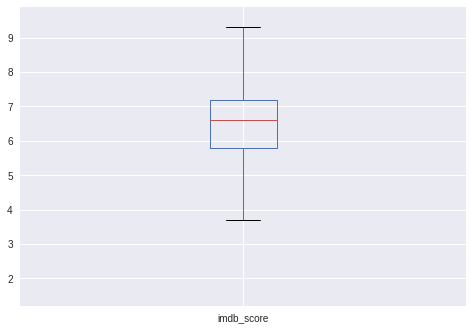

In [0]:
df.boxplot(column=['imdb_score'])

## Третя частина

## Z-Стандартизація

In [0]:
cols = ['imdb_score', 'num_user_for_reviews']
for col in cols:
  col_zscore = col + '_zsc'
  df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df.head()

,director_name,duration,genres,movie_title,num_user_for_reviews,country,budget,title_year,imdb_score,movie_facebook_likes,imdb_score_zsc,num_user_for_reviews_zsc
0,James Cameron,178.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,3054.0,USA,237000000.0,2009.0,7.9,33000,1.295873,7.358815
1,Gore Verbinski,169.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,1238.0,USA,300000000.0,2007.0,7.1,0,0.584764,2.553886
2,Sam Mendes,148.0,Action|Adventure|Thriller,Spectre,994.0,UK,245000000.0,2015.0,6.8,85000,0.318099,1.908290
3,Christopher Nolan,164.0,Action|Thriller,The Dark Knight Rises,2701.0,USA,250000000.0,2012.0,8.5,164000,1.829204,6.424817
4,Doug Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,7.1,0,0.584764,NaN


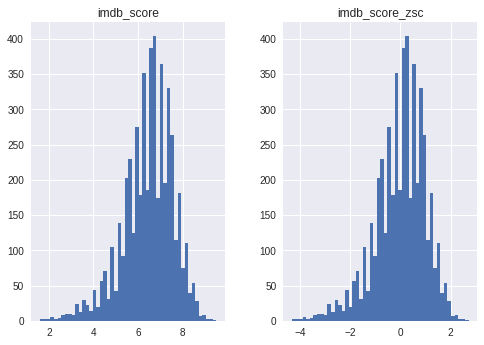

In [0]:
hist = df.hist(column=['imdb_score', 'imdb_score_zsc'], bins=50) 

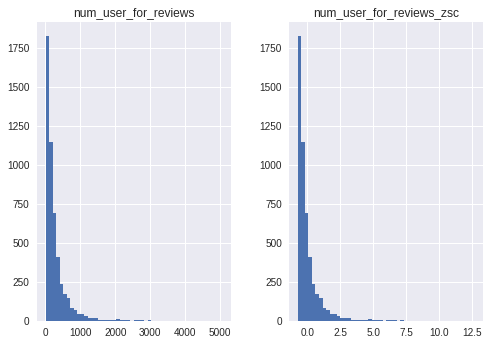

In [0]:
hist = df.hist(column=['num_user_for_reviews', 'num_user_for_reviews_zsc'], bins=50) 

## Правило 2-3 сігм

In [0]:
df['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

In [0]:
import math

df['imdb_score'].describe()
avg = df['imdb_score'].mean()
std = df['imdb_score'].std()

min100 = avg - 3*std;
max100 = avg + 3*std;

min95 = avg - 2*std;
max95 = avg + 2*std;

min68 = avg - std;
max68 = avg + std;

print("avg of imdb_score =",avg)
print("std of imdb_score =",std,"\n")

print(min68,"<= 68% <=",max68)
print(min95,"<= 95% <=",max95)
print(min100,"<= 100% <=",max100)

('avg of imdb_score =', 6.442137616498116)
('std of imdb_score =', 1.125115865732819, '\n')
(5.3170217507652975, '<= 68% <=', 7.567253482230935)
(4.191905885032478, '<= 95% <=', 8.692369347963755)
(3.066790019299659, '<= 100% <=', 9.817485213696575)


## Довірчі інтервали

In [0]:
se = df['imdb_score'].std()/math.sqrt(df['imdb_score'].count())
print('average imdb_score = {}\nstd imdb_score = {}\nse = {}'.format(avg, std, se))
print('95% довірчий інтервал:[{};{}];'.format(avg-1.96*se, avg+1.96*se))
print('95% довірчий інтервал:[{};{}];'.format(avg-2.58*se, avg+2.58*se))

average imdb_score = 6.4421376165
std imdb_score = 1.12511586573
se = 0.0158435597061
95% довірчий інтервал:[6.41108423947;6.47319099352];
95% довірчий інтервал:[6.40126123246;6.48301400054];


## Контрольні запитання 
1. Що ви знаєте про нормальний розподіл? Які його характеристики? 
Нормальний закон розподілу (normal law of distribution) (який ще називається законом Гаусса) відіграє виключно важливу роль в теорії ймовірностей і займає серед інших законів розподілу особливий стан. Це закон, який найчастіше зустрічається на практиці. Головна особливість, яка виділяє нормальний закон серед інших законів, полягає в тому, що він є граничним законом, до якого наближаються інші закони розподілу.Нормальний розподіл — розподіл ймовірностей випадкової величини, що характеризується густиною ймовірності.


2. Що таке z-стандартизація? Навіщо вона потрібна? В чому вона вимірюється? І що, скажімо, означає, якщо z-значення = 1.5? 
z-стандартизація - перетворення отриманих даних, у стандартну Z-шкалу із такими характеристиками:
-середнє значення   Mz  відтепер буде = 0;
-дисперсія і стандартне відхилення   Dz  = 1.

3. Для чого потрібна гістограма?

гістограма - спосіб графічного представлення табличних даних. Являє собою діаграму, що складається з прямокутників без розривів між ними. Кількісні співвідношення деякого показника представлені у вигляді прямокутників, площі яких пропорційні. Найчастіше для зручності сприйняття ширину прямокутників беруть однакову, при цьому їх висота визначає співвідношення відображуваного параметра.

4. В чому суть правила 2-3 Сігм? 
Можна дізнатися де будуть знаходитися 68%, 95%, та 100% спостережень за середнім арифметичним значенням та середнє квадратичне відхиленням

5. В чому основна суть ЦГТ?
Центральна гранична теорема — теорема теорії ймовірностей про збіжність розподілу суми незалежних однаково розподілених випадкових величин до нормального розподілу. Ця теорема підкреслює особливість нормального розподілу в теорії ймовірностей.
Центральна гранична теорема має декілька варіантів. У своїй загальній формі, випадкові величини повинні бути однаково розподілені. У деяких варіантах, збіжність середнього значення прямує до нормального розподілу також і у випадку не однаково розподілених величин, або не лише при незалежних спостереженнях, що буде здійснюватися за умови виконання певних умов.

6. В чому можуть допомогти довірчі інтервали для середнього? Яке їх призначення?
При статистичній обробці даних часто вимагається не тільки знайти для параметра а відповідне числове значення, а й оцінити його надійність і точність. Ця задача важлива при малій кількості спостережень, оскільки точкова оцінка а*  в значній мірі є випадковою і наближена заміна а на а* може призвести до серйозних похибок.

Для визначення точності оцінки а*  в математиці користуються довірчими інтервалами, а для визначення надійності – довірчою імовірністю.

7. Наскільки необхідно змінити межу нашого довірчого інтервалу, щоб збільшити ймовірність включення середнього з генеральної сукупності у нього з 95% до 99%?


# Лабораторна робота №2


## графік № 1 Basic connected scatterplot

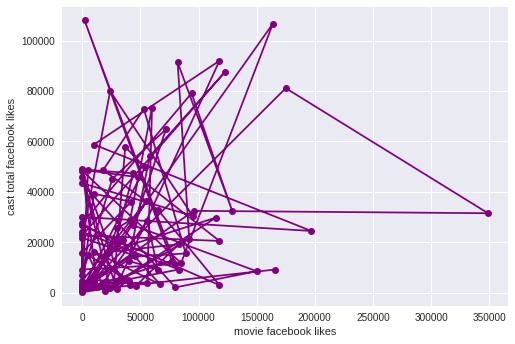

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
from PIL import Image
!python -m pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
df = df[:100]
x = df['movie_facebook_likes']
y = df['cast_total_facebook_likes']
plt.plot(x, y, color="purple", marker='o')
plt.xlabel("movie facebook likes")
plt.ylabel("cast total facebook likes")
plt.show()

## Графік №2 Basic lollipop plot

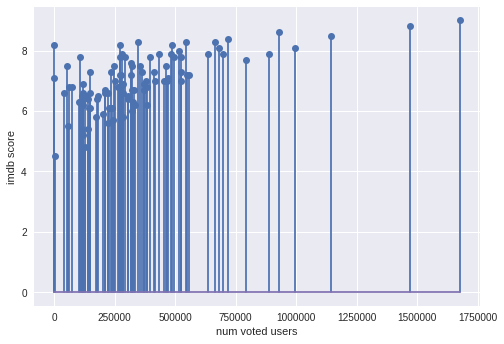

In [0]:
x = df['num_voted_users'].values
y = df['imdb_score'].values
plt.stem(x, y)
plt.plot()
plt.xlabel("num voted users")
plt.ylabel("imdb score")
plt.show()

## Графік №3 Pie plot

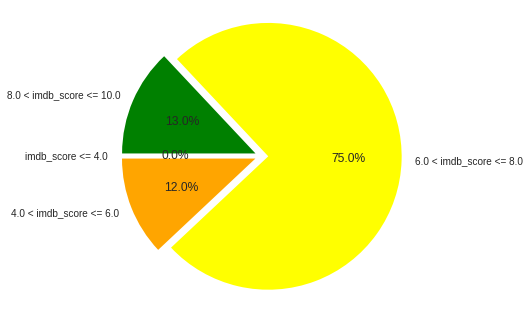

In [0]:
labels = 'imdb_score <= 4.0', '4.0 < imdb_score <= 6.0', '6.0 < imdb_score <= 8.0', '8.0 < imdb_score <= 10.0'
s1 = df['imdb_score'][df['imdb_score']<=4.0].count()
s2 = df['imdb_score'][df['imdb_score']<=6.0].count() - s1
s3 = df['imdb_score'][df['imdb_score']<=8.0].count() - s2 -s1
s4 = df['imdb_score'][df['imdb_score']<=10.0].count() - s3 -s2 -s1
sections = [s1,s2,s3,s4]
colors = ['blue', 'orange', 'yellow', 'green']
plt.pie(sections, labels=labels, colors=colors,
        startangle=180,
        explode = (0.05, 0.05, 0.05, 0.05),
        autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

## Графік №4 Box Plot

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


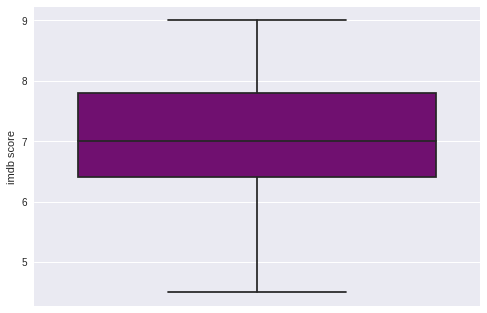

In [0]:
sns.boxplot(y=df["imdb_score"],color="purple")
sns.plt.ylabel("imdb score")
sns.plt.show()

## Графік №5 WordCloud

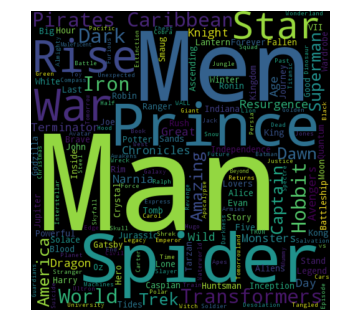

In [0]:
text = df['movie_title'].values
wordcloud = WordCloud(width=480, height=480, margin=0).generate(' '.join(text))
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Графік №6 Basic density plot

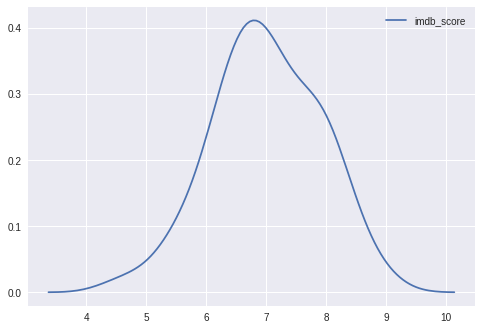

In [0]:
sns.kdeplot(df['imdb_score'])


## Графік №7 Density plot for several variables

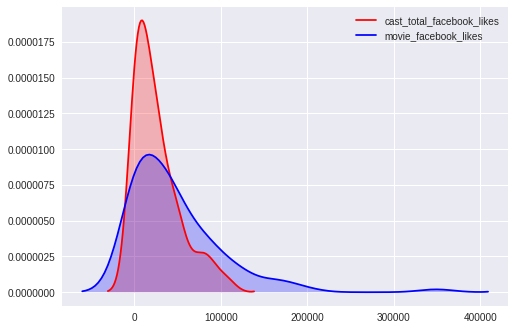

In [0]:
p1=sns.kdeplot(df['cast_total_facebook_likes'], shade=True, color="r")
p1=sns.kdeplot(df['movie_facebook_likes'], shade=True, color="b")


## Графік №8 seaborn histogram


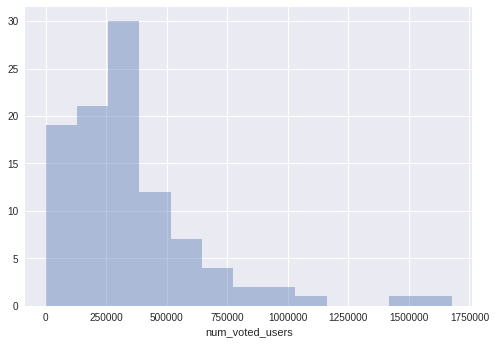

In [0]:
sns.distplot( a=df["num_voted_users"], hist=True, kde=False, rug=False )

## Графік №9 Scatterplot with regression | seaborn

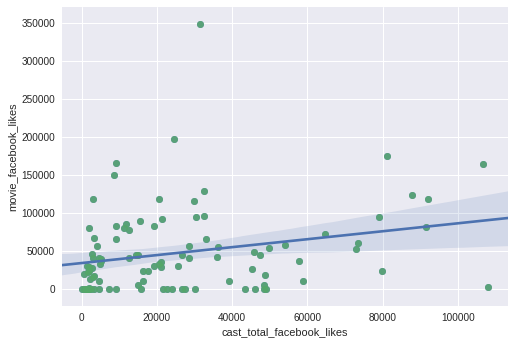

In [0]:
sns.regplot(x=df["cast_total_facebook_likes"], y=df["movie_facebook_likes"])
#sns.plt.show()
 
# Without regression fit:
sns.regplot(x=df["cast_total_facebook_likes"], y=df["movie_facebook_likes"], fit_reg=False)
#sns.plt.show()


## Графік №10 Basic violinplot and input formats

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:588: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:816: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



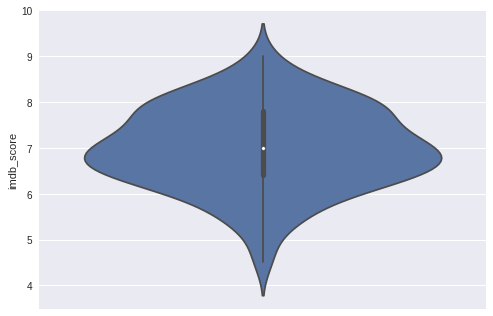

In [0]:
sns.violinplot( y=df["imdb_score"] )


### Контрольні запитання
1. Ваші враження від такого феєричного ореолу засобів візуалізації в Python-екосистемі.

Є  класні і прикольні штучки , які можна юзати в майбутньому

2. Чим, на вашу думку, ще можна підсилити свої можливості по візуалізації, привнісши інструменти, що знаходяться ПОЗА межею Python-екосистеми? (конкретика)

Мені не доводилися працювати з якимись цікавими інструментами візуалізації, тому не знаю що може підсилити можливості по візуалізації.

# Лабораторна робота №4

## Обчислення коефіцієнта кореляції Пірсона та p-рівня значимості

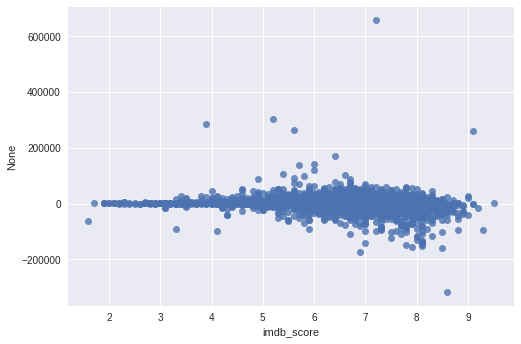

('Coef pirsons corelation: ', 0.08578734754800732)
Р-value = 0.00000000104847362661


In [3]:
sns.regplot(x=df["imdb_score"], y=df['cast_total_facebook_likes']-df['movie_facebook_likes'], fit_reg=False)
sns.plt.show()
pearson_coef, p_value = stats.pearsonr(df['imdb_score'],df['cast_total_facebook_likes'])
print("Coef pirsons corelation: ", pearson_coef) 
print("Р-value = %.20f" % p_value)

## Регресія

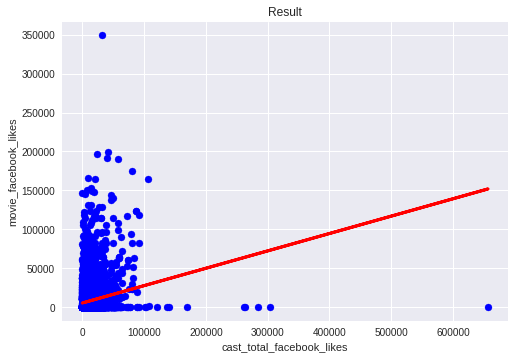

In [2]:
df['cast_total_facebook_likes'].fillna(0, inplace=True)
df['movie_facebook_likes'].fillna(0, inplace=True)
X = df['cast_total_facebook_likes'].values
Y = df['movie_facebook_likes'].values
X = X.reshape(df['cast_total_facebook_likes'].shape[0], 1)
Y = Y.reshape(df['movie_facebook_likes'].shape[0], 1)
df_simple=df.sample(n=1000)


X_train = X[:-4042]
X_test = X[-1000:]


Y_train = Y[:-4042]
Y_test = Y[-1000:]

regr = linear_model.LinearRegression()
regr.fit(X, Y)

plt.title('Result')
plt.xlabel('cast_total_facebook_likes')
plt.ylabel('movie_facebook_likes')

plt.scatter(X, Y,  color='blue')
plt.plot(X, regr.predict(X), color='red', linewidth=3)

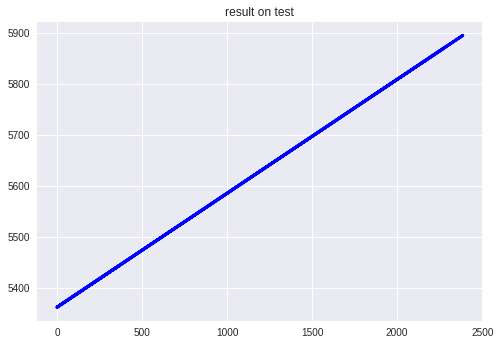

In [0]:
regr = linear_model.LinearRegression()

regr.fit(X_train, Y_train)

plt.title('result on test')
plt.plot(X_test, regr.predict(X_test), color='blue',linewidth=3)

## Контрольні Запитання
1. Опишіть заради якої мети використовують кореляцію та регресію. Які сильні сторони цих інструментів? Які "підводні камені"?

Правильне застосування кореляційних методів дає змогу зрозуміти глибинну сутність процесів взаємозв’язків. Kореляція дуже чутлива до значень, які зустрічаються дуже рідко, але дуже відрізняються від інших у вибірці і по можить суттєво вплинути на значення коєфіціяєнта кореляції Пірсона.

Регресійний аналіз використовується в тому випадку, якщо відношення між змінними можуть бути виражені кількісно у виді деякої комбінації цих змінних.